## Importing Required Libraries 

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt 

In [2]:
dataset=pd.read_csv('Advertising.csv')

In [3]:
dataset.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
dataset.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

This shows no null values present in the dataset 

Dropping columns "unnamed" as there is no need for it as it is only the index

In [6]:
dataset = dataset.drop("Unnamed: 0",axis=1)

In [7]:
dataset.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Separating the values for training and testing

In [8]:
x=dataset.drop("Sales",axis=1)

In [9]:
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [10]:
y=dataset["Sales"]

In [11]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

## Applying train test split

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=43)

The best result can be obtained at random_Sate =43 and size= 0.2

In [13]:
x_train.head()

,TV,Radio,Newspaper
116,139.2,14.3,25.6
138,43.0,25.9,20.5
155,4.1,11.6,5.7
82,75.3,20.3,32.5
160,172.5,18.1,30.7


In [14]:
sc= StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

In [15]:
x_train_scaled

array([[-0.09119592, -0.58711725, -0.21518531],
       [-1.21558521,  0.1850551 , -0.44825036],
       [-1.6702499 , -0.76684702, -1.12459599],
       [-0.83806157, -0.18771776,  0.100138  ],
       [ 0.29801576, -0.33416424,  0.01787975],
       [ 0.83566552, -1.17955982, -0.13292705],
       [ 0.20451145, -0.14777781,  0.78105354],
       [-1.43999554,  0.79746765,  1.62648559],
       [ 0.60657997,  1.74936976,  1.35686131],
       [-0.30976224,  0.35812821, -0.73615424],
       [-1.56388875, -0.48061072,  0.8815914 ],
       [-1.02156377, -0.74022039,  0.58454771],
       [-0.10639037,  1.54967001,  1.31116228],
       [ 1.55681748, -0.86669689, -0.40712123],
       [-0.17885621, -0.31419426,  0.19610596],
       [ 0.6170992 , -1.36594625, -0.41626104],
       [ 0.56567183,  1.63620657,  1.0323982 ],
       [ 1.5626615 , -0.61374388,  0.30578363],
       [-1.3967498 , -1.43251283, -0.43911055],
       [-1.49142291, -0.47395406, -0.3659921 ],
       [-0.43482425, -0.58711725,  0.063

Applying linear Regression as this is a sales prediction model, linear regression should work just fine 

In [16]:
lr = LinearRegression()
lr.fit(x_train_scaled,y_train)

LinearRegression()

In [17]:
y_pred = lr.predict(x_test_scaled,)

In [18]:
y_pred

array([ 8.54034679, 15.57247463, 12.00612144,  9.67279861, 11.42385092,
       18.55293488, 24.02278242,  7.05365828, 22.12551494, 16.72065638,
        7.85081793, 23.11509395, 19.18719498,  5.40127091, 15.23576551,
        9.90642579, 11.94342451,  9.81855823, 21.14401409,  9.1534307 ,
       20.44468759, 12.29808365, 13.5869414 , 10.57031008, 16.26513055,
        7.86253245, 20.69472029, 20.35016487,  9.00527669, 14.11934464,
       17.20367735, 15.11272068, 17.23013018, 19.08466691, 17.13277712,
       12.31707038, 12.73960467,  6.07982336, 10.01695956, 13.32737828])

## Performing Evaluation of the model 

In [19]:
r2_score(y_test,y_pred)

0.9286102071081018

## Plotting the Results

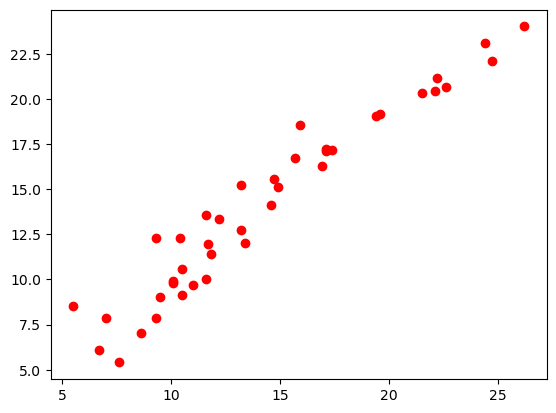

In [20]:
plt.scatter(y_test,y_pred,c='r')

In [21]:


def predict_sales(tv, radio, newspaper):
    input_data = pd.DataFrame({"TV": [tv], "Radio": [radio], "Newspaper": [newspaper]})
    input_data_scaled = sc.transform(input_data)
    prediction = lr.predict(input_data_scaled)
    return prediction[0]

In [22]:
while True:
    tv = input("Enter TV budget (or 'q' to exit): ")
    if tv.lower() == 'q':
        print("Exiting...")
        break
    radio = input("Enter Radio budget: ")
    newspaper = input("Enter Newspaper budget: ")
    try:
        tv = float(tv)
        radio = float(radio)
        newspaper = float(newspaper)
        prediction = predict_sales(tv, radio, newspaper)
        print(f"\n\nPredicted Sales: {prediction:.2f}\n")
    except ValueError:
        print("Please enter valid numbers or 'q' to exit.\n")

Enter TV budget (or 'q' to exit): 214
Enter Radio budget: 24
Enter Newspaper budget: 4


Predicted Sales: 17.17

Enter TV budget (or 'q' to exit): q
Exiting...
